# Formula 1 data analysis: 

### What are we looking to achieve: 

* Visualizing and exploring the data 
* Joining tables 
* Predicting if the car is going to have a points finish 

### Loading PySpark instance on the notebook

In [1]:
import os 
os.environ['SPARK_HOME'] = '/Users/youssefragab/spark-3.0.1-bin-hadoop3.2/'
import findspark 
findspark.init()
from pyspark import SparkContext
spark = SparkContext(appName = 'final_project')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas

In [3]:
spark

<SparkContext master=local[*] appName=final_project>

In [4]:
from pyspark import SQLContext
sqlc = SQLContext(spark)

In [5]:
sqlc

### Loading the data into the instance

Now that we have loaded the sql instance, we can use sql to read in the csv files into pySpark dataframes:

In [6]:
circuits = sqlc.read.csv('circuits.csv', header = True, inferSchema = True)
circuits.createOrReplaceTempView('circuits')

circuits.show(10)

+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57| 2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|  29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 7.42056|

In [7]:
constructor_results = sqlc.read.csv('constructor_results.csv', header = True, inferSchema = True)
constructor_results.createOrReplaceTempView('constructor_results')

constructor_results.show(10)

+--------------------+------+-------------+------+------+
|constructorResultsId|raceId|constructorId|points|status|
+--------------------+------+-------------+------+------+
|                   1|    18|            1|  14.0|    \N|
|                   2|    18|            2|   8.0|    \N|
|                   3|    18|            3|   9.0|    \N|
|                   4|    18|            4|   5.0|    \N|
|                   5|    18|            5|   2.0|    \N|
|                   6|    18|            6|   1.0|    \N|
|                   7|    18|            7|   0.0|    \N|
|                   8|    18|            8|   0.0|    \N|
|                   9|    18|            9|   0.0|    \N|
|                  10|    18|           10|   0.0|    \N|
+--------------------+------+-------------+------+------+
only showing top 10 rows



In [8]:
constructor_standings = sqlc.read.csv('constructor_standings.csv', header = True, inferSchema = True)
constructor_standings.createOrReplaceTempView('constructor_standings')

constructor_standings.show(10)

+----------------------+------+-------------+------+--------+------------+----+
|constructorStandingsId|raceId|constructorId|points|position|positionText|wins|
+----------------------+------+-------------+------+--------+------------+----+
|                     1|    18|            1|  14.0|       1|           1|   1|
|                     2|    18|            2|   8.0|       3|           3|   0|
|                     3|    18|            3|   9.0|       2|           2|   0|
|                     4|    18|            4|   5.0|       4|           4|   0|
|                     5|    18|            5|   2.0|       5|           5|   0|
|                     6|    18|            6|   1.0|       6|           6|   0|
|                     7|    19|            1|  24.0|       1|           1|   1|
|                     8|    19|            2|  19.0|       2|           2|   0|
|                     9|    19|            3|   9.0|       4|           4|   0|
|                    10|    19|         

In [9]:
constructors = sqlc.read.csv('constructors.csv', header = True, inferSchema = True)
constructors.createOrReplaceTempView('constructors')

constructors.show(10)

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber| BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|   Williams|    British|http://en.wikiped...|
|            4|       renault|    Renault|     French|http://en.wikiped...|
|            5|    toro_rosso| Toro Rosso|    Italian|http://en.wikiped...|
|            6|       ferrari|    Ferrari|    Italian|http://en.wikiped...|
|            7|        toyota|     Toyota|   Japanese|http://en.wikiped...|
|            8|   super_aguri|Super Aguri|   Japanese|http://en.wikiped...|
|            9|      red_bull|   Red Bull|   Austrian|http://en.wikiped...|
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
+-----------

In [10]:
driver_standings = sqlc.read.csv('driver_standings.csv', header = True, inferSchema = True)
driver_standings.createOrReplaceTempView('driver_standings')

driver_standings.show(10)

+-----------------+------+--------+------+--------+------------+----+
|driverStandingsId|raceId|driverId|points|position|positionText|wins|
+-----------------+------+--------+------+--------+------------+----+
|                1|    18|       1|  10.0|       1|           1|   1|
|                2|    18|       2|   8.0|       2|           2|   0|
|                3|    18|       3|   6.0|       3|           3|   0|
|                4|    18|       4|   5.0|       4|           4|   0|
|                5|    18|       5|   4.0|       5|           5|   0|
|                6|    18|       6|   3.0|       6|           6|   0|
|                7|    18|       7|   2.0|       7|           7|   0|
|                8|    18|       8|   1.0|       8|           8|   0|
|                9|    19|       1|  14.0|       1|           1|   1|
|               10|    19|       2|  11.0|       3|           3|   0|
+-----------------+------+--------+------+--------+------------+----+
only showing top 10 

In [11]:
drivers = sqlc.read.csv('drivers.csv', header = True, inferSchema = True)
drivers.createOrReplaceTempView('drivers')

drivers.show(10)

+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|driverId| driverRef|number|code| forename|   surname|       dob|nationality|                 url|
+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|       1|  hamilton|    44| HAM|    Lewis|  Hamilton|1985-01-07|    British|http://en.wikiped...|
|       2|  heidfeld|    \N| HEI|     Nick|  Heidfeld|1977-05-10|     German|http://en.wikiped...|
|       3|   rosberg|     6| ROS|     Nico|   Rosberg|1985-06-27|     German|http://en.wikiped...|
|       4|    alonso|    14| ALO| Fernando|    Alonso|1981-07-29|    Spanish|http://en.wikiped...|
|       5|kovalainen|    \N| KOV|   Heikki|Kovalainen|1981-10-19|    Finnish|http://en.wikiped...|
|       6|  nakajima|    \N| NAK|   Kazuki|  Nakajima|1985-01-11|   Japanese|http://en.wikiped...|
|       7|  bourdais|    \N| BOU|Sébastien|  Bourdais|1979-02-28|     French|http://en.wikiped...|
|       8|

In [12]:
lap_times = sqlc.read.csv('lap_times.csv', header = True, inferSchema = True)
lap_times.createOrReplaceTempView('lap_times')

lap_times.show(10)

+------+--------+---+--------+--------+------------+
|raceId|driverId|lap|position|    time|milliseconds|
+------+--------+---+--------+--------+------------+
|   841|      20|  1|       1|1:38.109|       98109|
|   841|      20|  2|       1|1:33.006|       93006|
|   841|      20|  3|       1|1:32.713|       92713|
|   841|      20|  4|       1|1:32.803|       92803|
|   841|      20|  5|       1|1:32.342|       92342|
|   841|      20|  6|       1|1:32.605|       92605|
|   841|      20|  7|       1|1:32.502|       92502|
|   841|      20|  8|       1|1:32.537|       92537|
|   841|      20|  9|       1|1:33.240|       93240|
|   841|      20| 10|       1|1:32.572|       92572|
+------+--------+---+--------+--------+------------+
only showing top 10 rows



In [13]:
pit_stops = sqlc.read.csv('pit_stops.csv', header = True, inferSchema = True)
pit_stops.createOrReplaceTempView('pit_stops')

pit_stops.show(10)

+------+--------+----+---+--------+--------+------------+
|raceId|driverId|stop|lap|    time|duration|milliseconds|
+------+--------+----+---+--------+--------+------------+
|   841|     153|   1|  1|17:05:23|  26.898|       26898|
|   841|      30|   1|  1|17:05:52|  25.021|       25021|
|   841|      17|   1| 11|17:20:48|  23.426|       23426|
|   841|       4|   1| 12|17:22:34|  23.251|       23251|
|   841|      13|   1| 13|17:24:10|  23.842|       23842|
|   841|      22|   1| 13|17:24:29|  23.643|       23643|
|   841|      20|   1| 14|17:25:17|  22.603|       22603|
|   841|     814|   1| 14|17:26:03|  24.863|       24863|
|   841|     816|   1| 14|17:26:50|  25.259|       25259|
|   841|      67|   1| 15|17:27:34|  25.342|       25342|
+------+--------+----+---+--------+--------+------------+
only showing top 10 rows



In [14]:
qualifying = sqlc.read.csv('qualifying.csv', header = True, inferSchema = True)
qualifying.createOrReplaceTempView('qualifying')

qualifying.show(10)

+---------+------+--------+-------------+------+--------+--------+--------+--------+
|qualifyId|raceId|driverId|constructorId|number|position|      q1|      q2|      q3|
+---------+------+--------+-------------+------+--------+--------+--------+--------+
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|
|        2|    18|       9|            2|     4|       2|1:26.103|1:25.315|1:26.869|
|        3|    18|       5|            1|    23|       3|1:25.664|1:25.452|1:27.079|
|        4|    18|      13|            6|     2|       4|1:25.994|1:25.691|1:27.178|
|        5|    18|       2|            2|     3|       5|1:25.960|1:25.518|1:27.236|
|        6|    18|      15|            7|    11|       6|1:26.427|1:26.101|1:28.527|
|        7|    18|       3|            3|     7|       7|1:26.295|1:26.059|1:28.687|
|        8|    18|      14|            9|     9|       8|1:26.381|1:26.063|1:29.041|
|        9|    18|      10|            7|    12|       9|1:26.919

In [15]:
races = sqlc.read.csv('races.csv', header = True, inferSchema = True)
races.createOrReplaceTempView('races')

races.show(10)

+------+----+-----+---------+--------------------+----------+--------+--------------------+
|raceId|year|round|circuitId|                name|      date|    time|                 url|
+------+----+-----+---------+--------------------+----------+--------+--------------------+
|     1|2009|    1|        1|Australian Grand ...|2009-03-29|06:00:00|http://en.wikiped...|
|     2|2009|    2|        2|Malaysian Grand Prix|2009-04-05|09:00:00|http://en.wikiped...|
|     3|2009|    3|       17|  Chinese Grand Prix|2009-04-19|07:00:00|http://en.wikiped...|
|     4|2009|    4|        3|  Bahrain Grand Prix|2009-04-26|12:00:00|http://en.wikiped...|
|     5|2009|    5|        4|  Spanish Grand Prix|2009-05-10|12:00:00|http://en.wikiped...|
|     6|2009|    6|        6|   Monaco Grand Prix|2009-05-24|12:00:00|http://en.wikiped...|
|     7|2009|    7|        5|  Turkish Grand Prix|2009-06-07|12:00:00|http://en.wikiped...|
|     8|2009|    8|        9|  British Grand Prix|2009-06-21|12:00:00|http://en.

In [16]:
results = sqlc.read.csv('results.csv', header = True, inferSchema = True)
results.createOrReplaceTempView('results')

results.show(10)

+--------+------+--------+-------------+------+----+--------+------------+-------------+------+----+-----------+------------+----------+----+--------------+---------------+--------+
|resultId|raceId|driverId|constructorId|number|grid|position|positionText|positionOrder|points|laps|       time|milliseconds|fastestLap|rank|fastestLapTime|fastestLapSpeed|statusId|
+--------+------+--------+-------------+------+----+--------+------------+-------------+------+----+-----------+------------+----------+----+--------------+---------------+--------+
|       1|    18|       1|            1|    22|   1|       1|           1|            1|  10.0|  58|1:34:50.616|     5690616|        39|   2|      1:27.452|        218.300|       1|
|       2|    18|       2|            2|     3|   5|       2|           2|            2|   8.0|  58|     +5.478|     5696094|        41|   3|      1:27.739|        217.586|       1|
|       3|    18|       3|            3|     7|   7|       3|           3|            3|  

In [17]:
seasons = sqlc.read.csv('seasons.csv', header = True, inferSchema = True)
seasons.createOrReplaceTempView('seasons')

seasons.show(10)

+----+--------------------+
|year|                 url|
+----+--------------------+
|2009|https://en.wikipe...|
|2008|https://en.wikipe...|
|2007|https://en.wikipe...|
|2006|https://en.wikipe...|
|2005|https://en.wikipe...|
|2004|https://en.wikipe...|
|2003|https://en.wikipe...|
|2002|https://en.wikipe...|
|2001|https://en.wikipe...|
|2000|https://en.wikipe...|
+----+--------------------+
only showing top 10 rows



In [18]:
status = sqlc.read.csv('status.csv', header = True, inferSchema = True)
status.createOrReplaceTempView('status')

status.show(10)

+--------+------------+
|statusId|      status|
+--------+------------+
|       1|    Finished|
|       2|Disqualified|
|       3|    Accident|
|       4|   Collision|
|       5|      Engine|
|       6|     Gearbox|
|       7|Transmission|
|       8|      Clutch|
|       9|  Hydraulics|
|      10|  Electrical|
+--------+------------+
only showing top 10 rows



## Data analysis 

### Which constuctors have the highest number and percentage or retirements?

The first thing we need to do is create a table with the races and the finishes for each team. 

In [19]:
reliability = sqlc.sql("""
    SELECT constructors.name, status.statusId, status.status, (SELECT COUNT(*) FROM results GROUP BY constructorId) AS total_races
    FROM status, results, constructors 
    WHERE constructors.constructorId == results.constructorId
        AND status.statusId == results.statusId
        AND status.status NOT LIKE 'Finished'
        AND status.status NOT LIKE '%Lap%'
""")
reliability.createOrReplaceTempView('reliability')

In [20]:
total_races = sqlc.sql("""
    SELECT constructors.name, count(*) AS total_races
    FROM constructors, results
    WHERE constructors.constructorId == results.constructorId
    GROUP BY name
    ORDER BY total_races DESC
""")
total_races.createOrReplaceTempView('total_races')

In [21]:
sqlc.sql("""
    SELECT * 
    FROM total_races
""").show()

+-----------+-----------+
|       name|total_races|
+-----------+-----------+
|    Ferrari|       2277|
|    McLaren|       1761|
|   Williams|       1515|
|    Tyrrell|        881|
| Team Lotus|        871|
|     Sauber|        789|
|    Renault|        787|
|    Minardi|        672|
|    Brabham|        662|
|   Red Bull|        626|
|     Ligier|        611|
|     Arrows|        590|
|        BRM|        562|
| Toro Rosso|        536|
|      March|        524|
|   Benetton|        520|
|     Jordan|        500|
|   Mercedes|        490|
|   Maserati|        436|
|Force India|        424|
+-----------+-----------+
only showing top 20 rows



Ferrari is by far the team with the most races in the history of F1, closely followed by Williams and McLaren. These top 3 teams are all still active. And while teams are bought and race under the different names, we are going to consider them as being different teams for the purpose of this analysis. For example, Alpine previously raced under the name Renault and Lotus F1, and was founded as Benetton. So we are going to treat them as being 4 separate teams, the same goes for all the other teams that have raced in F1. 

In [22]:
sqlc.sql("""
    SELECT status, count(*) AS number_of_retirements, name
    FROM reliability 
    GROUP BY name, status
    ORDER BY number_of_retirements DESC
""").show(10)

+---------+---------------------+----------+
|   status|number_of_retirements|      name|
+---------+---------------------+----------+
|   Engine|                  163|   Ferrari|
|   Engine|                  126|   McLaren|
|   Engine|                   99|   Tyrrell|
|   Engine|                   95|Team Lotus|
| Accident|                   93|   Ferrari|
|   Engine|                   87|       BRM|
|   Engine|                   80|  Williams|
|   Engine|                   80|   Brabham|
|Collision|                   72|  Williams|
|Collision|                   70|   McLaren|
+---------+---------------------+----------+
only showing top 10 rows



We can first look for the retirement reasons that feature the most often, and then find the teams to which these happen the most. 

In [23]:
sqlc.sql("""
    SELECT status, count(*)
    FROM reliability 
    GROUP BY status
    ORDER BY count(*) DESC
""").show()

+------------------+--------+
|            status|count(1)|
+------------------+--------+
|            Engine|    2003|
|          Accident|    1033|
|   Did not qualify|    1025|
|         Collision|     809|
|           Gearbox|     798|
|          Spun off|     790|
|        Suspension|     428|
|Did not prequalify|     331|
|      Transmission|     321|
|        Electrical|     315|
|            Brakes|     248|
|          Withdrew|     243|
|            Clutch|     214|
|    Not classified|     172|
|       Fuel system|     155|
|             Turbo|     145|
|      Disqualified|     142|
|        Hydraulics|     133|
|       Overheating|     130|
|          Ignition|     128|
+------------------+--------+
only showing top 20 rows



Engine issues seem to be the biggest in F1, with over 2000 retirements because of engine failure. The second and third most prevalent DNF reasons are accidents and failing to qualify for the race. Both of these retirements only happened 1000 times, the gap between engine failures and the rest of the DNF reasons show just how much engines are prone to failure in a race. 

In [24]:
reliability \
    .filter("status == 'Engine'") \
    .groupBy('name') \
    .count() \
    .orderBy('count', ascending = False) \
    .show(10)

+----------+-----+
|      name|count|
+----------+-----+
|   Ferrari|  163|
|   McLaren|  126|
|   Tyrrell|   99|
|Team Lotus|   95|
|       BRM|   87|
|  Williams|   80|
|   Brabham|   80|
|  Maserati|   68|
|   Minardi|   63|
|    Ligier|   62|
+----------+-----+
only showing top 10 rows



As expected, the teams with the most number of races also have the most number of engine failures. What is interesting is that Williams has nearly half as many engine failures as Ferrari, and two thirds as many as McLaren, despite having entered almost as many races as the latter. 

We are now going to look at engine failures as a percentage of races entered, this should give us a better idea of reliability. We are only going to consider teams with more than 50 races under their belt, since any less than that and one engine failure will account for a large percentage of the races they entered. 

In [25]:
engine_failures = sqlc.sql("""
       SELECT name, count(*) AS engine_failures 
       FROM reliability 
       WHERE status == 'Engine'
       GROUP BY name
       ORDER BY engine_failures DESC
""")
engine_failures.createOrReplaceTempView('engine_failures')

In [26]:
sqlc.sql("""
    SELECT engine_failures.name, engine_failures.engine_failures, total_races.total_races, (engine_failures / total_races * 100) AS percentage
    FROM total_races, engine_failures
    WHERE engine_failures.name == total_races.name AND total_races > 50
    ORDER BY percentage DESC
""").show(10)

+------------------+---------------+-----------+------------------+
|              name|engine_failures|total_races|        percentage|
+------------------+---------------+-----------+------------------+
|           Vanwall|             16|         71|22.535211267605636|
|      Leyton House|             14|         64|            21.875|
|     Brabham-Repco|             14|         77|18.181818181818183|
|           Stewart|             17|         98|17.346938775510203|
|         Larrousse|             36|        216|16.666666666666664|
|           Dallara|             23|        144|15.972222222222221|
|   Cooper-Maserati|             21|        134|15.671641791044777|
|          Maserati|             68|        436| 15.59633027522936|
|               BRM|             87|        562|15.480427046263346|
|Brabham-Alfa Romeo|              9|         59|15.254237288135593|
+------------------+---------------+-----------+------------------+
only showing top 10 rows



Here we can see a list of the manufacturers with the highest percentage of engine failures by raced entered. We can also see the teams that have had the least engine failures as a percentage of races entered: 

In [27]:
sqlc.sql("""
    SELECT engine_failures.name, engine_failures.engine_failures, total_races.total_races, (engine_failures / total_races * 100) AS percentage
    FROM total_races, engine_failures
    WHERE engine_failures.name == total_races.name AND total_races > 50
    ORDER BY percentage ASC
""").show(10)

+------------+---------------+-----------+------------------+
|        name|engine_failures|total_races|        percentage|
+------------+---------------+-----------+------------------+
|    Caterham|              1|        112|0.8928571428571428|
|Haas F1 Team|              2|        218|0.9174311926605505|
|      Virgin|              1|         76|1.3157894736842104|
|    Mercedes|              7|        490|1.4285714285714286|
|     Pacific|              1|         66|1.5151515151515151|
| Force India|              7|        424| 1.650943396226415|
|         HRT|              2|        116|1.7241379310344827|
|    Red Bull|             11|        626|1.7571884984025559|
|  AlphaTauri|              1|         52|1.9230769230769231|
|    Lotus F1|              3|        154| 1.948051948051948|
+------------+---------------+-----------+------------------+
only showing top 10 rows



Many of the manufacturers that feature in the list of best engine reliability are active in the turbo-hybrid era. We can see that there is a significant increase in engine reliability in recent seasons. To dig a little deeper into this, we can find the most engine failures by season, as opposed to by team. 

In [28]:
DNF_by_year = sqlc.sql("""
    SELECT results.raceId, races.year, results.constructorId, status.status
    FROM races, results, status
    WHERE results.raceId == races.raceId
        AND status.statusId == results.statusId
        AND status NOT LIKE 'Finished'
        AND status NOT LIKE '%Lap%'
""")
DNF_by_year.createOrReplaceTempView('DNF_by_year')

In [29]:
engine_failures_by_year = sqlc.sql("""
    SELECT year, count(*) AS engine_failures
    FROM DNF_by_year
    WHERE status LIKE 'Engine'
    GROUP BY year
    ORDER BY year ASC
""").toPandas()

<AxesSubplot:xlabel='year', ylabel='engine_failures'>

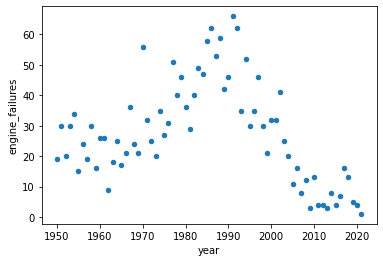

In [30]:
engine_failures_by_year.plot.scatter(x = 'year', y = 'engine_failures')

As perviously hypothesized, it seems that engine reliability is much better than it used to be. We do, however, see an increase in engine failures that starts from the 1970s and peaks in the early 90s. 

We are now going to run the same type of analysis on accidents, and we can see the accident rates of each team. 

In [31]:
accidents = sqlc.sql("""
    SELECT name, count(*) AS accident_count
    FROM reliability 
    WHERE status == 'Accident'
    GROUP BY name
""")
accidents.createOrReplaceTempView('accidents')

In [32]:
accidents.show(10)

+--------------------+--------------+
|                name|accident_count|
+--------------------+--------------+
|              Shadow|            21|
|               Simca|             2|
|        Leyton House|             1|
|            Politoys|             1|
|Lotus-Pratt &amp;...|             1|
|                Lola|            12|
|      Brabham-Climax|             1|
|              Jaguar|             5|
|                Wolf|            13|
|            Parnelli|             2|
+--------------------+--------------+
only showing top 10 rows



In [33]:
sqlc.sql("""
    SELECT accidents.name, total_races, accident_count, (accident_count / total_races * 100) AS percentage
    FROM total_races, accidents 
    WHERE accidents.name == total_races.name AND total_races > 100
    ORDER BY percentage DESC
""").show(10)

+------------+-----------+--------------+------------------+
|        name|total_races|accident_count|        percentage|
+------------+-----------+--------------+------------------+
|Kurtis Kraft|        226|            29|12.831858407079647|
|      Shadow|        211|            21|  9.95260663507109|
|     Surtees|        260|            25| 9.615384615384617|
|      Ensign|        154|            12| 7.792207792207792|
|   Lotus-BRM|        121|             9|  7.43801652892562|
|        Lola|        165|            12|7.2727272727272725|
|       March|        524|            38| 7.251908396946565|
|     Gordini|        102|             6|  5.88235294117647|
|      Cooper|        103|             6| 5.825242718446602|
|         BRM|        562|            32|5.6939501779359425|
+------------+-----------+--------------+------------------+
only showing top 10 rows



In [34]:
reliability \
    .filter("status == 'Gearbox'") \
    .groupBy('name') \
    .count() \
    .orderBy('count', ascending = False) \
    .show(10)

+----------+-----+
|      name|count|
+----------+-----+
|   Minardi|   60|
|   Ferrari|   45|
|Team Lotus|   41|
|   McLaren|   36|
|  Williams|   34|
|   Tyrrell|   33|
|   Brabham|   30|
|    Jordan|   25|
|       BRM|   24|
|    Arrows|   23|
+----------+-----+
only showing top 10 rows



In [35]:
gearbox = sqlc.sql("""
    SELECT name, count(*) AS gearbox_failures 
    FROM reliability 
    WHERE status == 'Gearbox'
    GROUP BY name 
""")
gearbox.createOrReplaceTempView('gearbox')

In [36]:
sqlc.sql("""
    SELECT gearbox.name, total_races, gearbox_failures, (gearbox_failures / total_races * 100) AS percentage 
    FROM gearbox, total_races
    WHERE gearbox.name == total_races.name AND total_races > 100
    ORDER BY percentage DESC
""").show(10)

+---------------+-----------+----------------+------------------+
|           name|total_races|gearbox_failures|        percentage|
+---------------+-----------+----------------+------------------+
|      Lotus-BRM|        121|              14|11.570247933884298|
|        Minardi|        672|              60| 8.928571428571429|
|       Zakspeed|        133|              10| 7.518796992481203|
|Cooper-Maserati|        134|               9|6.7164179104477615|
|       Footwork|        194|              13| 6.701030927835052|
|  Cooper-Climax|        268|              16| 5.970149253731343|
|        Dallara|        144|               8| 5.555555555555555|
|           Lola|        165|               9| 5.454545454545454|
|         Jaguar|        170|               9| 5.294117647058823|
|            BAR|        236|              12| 5.084745762711865|
+---------------+-----------+----------------+------------------+
only showing top 10 rows



In [37]:
suspension = sqlc.sql("""
    SELECT name, count(*) AS suspension_failures 
    FROM reliability 
    WHERE status == 'Suspension'
    GROUP BY name
""")
suspension.createOrReplaceTempView('suspension')

In [38]:
sqlc.sql("""
    SELECT suspension.name, total_races, suspension_failures, (suspension_failures / total_races * 100) AS percentage
    FROM suspension, total_races 
    WHERE suspension.name == total_races.name  AND total_races > 100
    ORDER BY percentage DESC
""").show(10)

+------------+-----------+-------------------+------------------+
|        name|total_races|suspension_failures|        percentage|
+------------+-----------+-------------------+------------------+
|     Surtees|        260|                 16| 6.153846153846154|
|  Lotus-Ford|        128|                  7|           5.46875|
|        Lola|        165|                  7| 4.242424242424243|
|     Gordini|        102|                  4|3.9215686274509802|
|Lotus-Climax|        233|                  9| 3.862660944206009|
|      Osella|        252|                  9| 3.571428571428571|
|       March|        524|                 18| 3.435114503816794|
|      Arrows|        590|                 20| 3.389830508474576|
|      Shadow|        211|                  7|3.3175355450236967|
|   Lotus-BRM|        121|                  4|3.3057851239669422|
+------------+-----------+-------------------+------------------+
only showing top 10 rows



## Driver accident rates 

Being able to stay away from accidents is one of the main things that define good F1 drivers. They must learn how to be aggressive, and push their rivals to the maximum, while also leaving enough room to make sure that they do not get into an accident. 
We will now take a look at the drives who have gotten into the most accidents, we will also see it as a percentage of races entered. 

In [39]:
driver_finishes = sqlc.sql("""
    SELECT results.position as race_position, concat(forename,' ', surname) AS driver_name, status
    FROM results, drivers, status 
    WHERE results.driverId == drivers.driverId AND results.statusId == status.statusId
""")
driver_finishes.createOrReplaceTempView('driver_finishes')

accidents = sqlc.sql("""
    SELECT driver_name, count(*) AS number_of_accidents 
    FROM driver_finishes 
    WHERE status == 'Accident'
    GROUP BY driver_name
""")
accidents.createOrReplaceTempView('accidents')

driver_races = sqlc.sql("""
    SELECT driver_name, count(*) AS number_of_races
    FROM driver_finishes 
    GROUP BY driver_name
    ORDER BY number_of_races DESC
""")
driver_races.createOrReplaceTempView('driver_races')

In [40]:
driver_races.show(10)

+------------------+---------------+
|       driver_name|number_of_races|
+------------------+---------------+
|    Kimi Räikkönen|            341|
|Rubens Barrichello|            326|
|   Fernando Alonso|            323|
|     Jenson Button|            309|
|Michael Schumacher|            308|
|    Lewis Hamilton|            275|
|      Felipe Massa|            271|
|  Sebastian Vettel|            267|
|  Riccardo Patrese|            257|
|      Jarno Trulli|            256|
+------------------+---------------+
only showing top 10 rows



In [41]:
accidents.show(10, False)

+------------------+-------------------+
|driver_name       |number_of_accidents|
+------------------+-------------------+
|Piercarlo Ghinzani|6                  |
|Richie Ginther    |3                  |
|Bill Vukovich     |1                  |
|François Cevert   |5                  |
|Hector Rebaque    |4                  |
|Lella Lombardi    |1                  |
|Innes Ireland     |5                  |
|Ray Crawford      |2                  |
|Cuth Harrison     |1                  |
|Larry Perkins     |1                  |
+------------------+-------------------+
only showing top 10 rows



In [42]:
sqlc.sql("""
    SELECT driver_races.driver_name, number_of_races, number_of_accidents, (number_of_accidents / number_of_races * 100) AS accident_percentage
    FROM driver_races, accidents
    WHERE driver_races.driver_name == accidents.driver_name
""") \
    .filter('number_of_races > 50') \
    .orderBy('accident_percentage', ascending = False) \
    .show(10)

+------------------+---------------+-------------------+-------------------+
|       driver_name|number_of_races|number_of_accidents|accident_percentage|
+------------------+---------------+-------------------+-------------------+
|Hans-Joachim Stuck|             81|                 18|  22.22222222222222|
|Vittorio Brambilla|             78|                 15| 19.230769230769234|
|        James Hunt|             93|                 14| 15.053763440860216|
| Patrick Depailler|             95|                 12| 12.631578947368421|
|    Clay Regazzoni|            138|                 17| 12.318840579710146|
|     Mike Hailwood|             51|                  6|  11.76470588235294|
|     Jackie Oliver|             51|                  6|  11.76470588235294|
|     Didier Pironi|             72|                  8|  11.11111111111111|
| Gilles Villeneuve|             68|                  7| 10.294117647058822|
| Vitantonio Liuzzi|             81|                  8|  9.876543209876543|

In [43]:
sqlc.sql("""
    SELECT driver_races.driver_name, number_of_races, number_of_accidents, (number_of_accidents / number_of_races * 100) AS accident_percentage
    FROM driver_races, accidents
    WHERE driver_races.driver_name == accidents.driver_name
""") \
    .filter('number_of_races > 50') \
    .orderBy('accident_percentage', ascending = True) \
    .show(10)

+------------------+---------------+-------------------+-------------------+
|       driver_name|number_of_races|number_of_accidents|accident_percentage|
+------------------+---------------+-------------------+-------------------+
|    Lewis Hamilton|            275|                  1|0.36363636363636365|
|        Jean Alesi|            202|                  1|0.49504950495049505|
|  Daniel Ricciardo|            197|                  1| 0.5076142131979695|
|         Mika Salo|            111|                  1| 0.9009009009009009|
|Rubens Barrichello|            326|                  3| 0.9202453987730062|
|    Jos Verstappen|            107|                  1| 0.9345794392523363|
|     Jenson Button|            309|                  3| 0.9708737864077669|
|       Pedro Diniz|             99|                  1| 1.0101010101010102|
|     Robert Kubica|             97|                  1| 1.0309278350515463|
|     Ukyo Katayama|             97|                  1| 1.0309278350515463|

Here we can see a list of the drivers with the highest percentage of accidents and those with the lowest percentage. We made the choice to only consider drivers with over 100 Grand Prix entries, because otherwise the percentage was altered if the number of races is too small. 

Some of the bigger names in Formula 1 figure in the list of drivers with the smallest accident percentage, this is unsurprising. 

Also a key part of being a great F1 driver is being able to avoid collisions, or less sever accidents that may cause something like a puncture or a damaged front wing. So next up, we are going to be performing the same operations to find the drivers with the highest and percentage of collisions. 

In [44]:
collisions = sqlc.sql("""
    SELECT driver_name, count(*) AS number_of_collisions
    FROM driver_finishes
    WHERE status == 'Collision'
    GROUP BY driver_name
""")
collisions.createOrReplaceTempView('collisions')

In [45]:
sqlc.sql("""
    SELECT driver_races.driver_name, number_of_races, number_of_collisions, (number_of_collisions / number_of_races * 100) AS collision_percentage
    FROM driver_races, collisions
    WHERE driver_races.driver_name == collisions.driver_name 
""") \
    .filter('number_of_races > 100') \
    .orderBy('collision_percentage', ascending = False) \
    .show(10)

+--------------------+---------------+--------------------+--------------------+
|         driver_name|number_of_races|number_of_collisions|collision_percentage|
+--------------------+---------------+--------------------+--------------------+
|    Pedro de la Rosa|            107|                  10|   9.345794392523365|
|          Damon Hill|            122|                  11|    9.01639344262295|
|        Adrian Sutil|            128|                  11|             8.59375|
|        Eddie Irvine|            147|                  12|    8.16326530612245|
|          Jean Alesi|            202|                  16|   7.920792079207921|
|      Johnny Herbert|            165|                  12|  7.2727272727272725|
|     Romain Grosjean|            181|                  13|    7.18232044198895|
|       Olivier Panis|            158|                  11|   6.962025316455696|
|Giancarlo Fisichella|            231|                  16|   6.926406926406926|
|        Jarno Trulli|      

In [46]:
collisions_perc = sqlc.sql("""
    SELECT driver_races.driver_name, number_of_races, number_of_collisions, (number_of_collisions / number_of_races * 100) AS collision_percentage
    FROM driver_races, collisions
    WHERE driver_races.driver_name == collisions.driver_name 
""") 

collisions_perc \
    .filter('number_of_races > 50') \
    .orderBy('collision_percentage', ascending = True) \
    .toPandas() \
    .head(10)

,driver_name,number_of_races,number_of_collisions,collision_percentage
0,John Watson,154,1,0.649351
1,Clay Regazzoni,138,1,0.724638
2,Jack Brabham,129,1,0.775194
3,Jacky Ickx,121,1,0.826446
4,Jochen Mass,114,1,0.877193
5,Denny Hulme,112,1,0.892857
6,Patrick Depailler,95,1,1.052632
7,Niki Lauda,174,2,1.149425
8,Valtteri Bottas,166,2,1.204819
9,Hans-Joachim Stuck,81,1,1.234568


In [47]:
collisions_perc \
    .filter('number_of_races > 50') \
    .orderBy('collision_percentage', ascending = False) \
    .toPandas() \
    .head(10)

,driver_name,number_of_races,number_of_collisions,collision_percentage
0,Bruno Giacomelli,82,8,9.756098
1,Pedro de la Rosa,107,10,9.345794
2,Sébastien Buemi,55,5,9.090909
3,Damon Hill,122,11,9.016393
4,Alexander Wurz,69,6,8.695652
5,Adrian Sutil,128,11,8.593750
6,Gianni Morbidelli,70,6,8.571429
7,Eddie Irvine,147,12,8.163265
8,Pedro Diniz,99,8,8.080808
9,Aguri Suzuki,88,7,7.954545


## Driver performance

We can now move on to looking at how drivers have performed over the years. 

### Qualifying 

The first thing we are going to look at is mean qualifying position, as it gives a good indication as to how the driver has fared over the years. There is an issue with Ayrton Senna, where he only features in 3 qualifying races where he was on pole position, which is why we are going to remove him from the qualifying comparison. For this particular analysis, we are going to focus solely on races after the 2006 season. This is when Formula 1 introduced the current format for qualifying, with Q1, Q2, and Q3. 

In [48]:
sqlc.sql("""
    SELECT concat(forename, ' ', surname) AS driver_name, round(mean(position), 3) AS mean_qual_position
    FROM drivers, qualifying 
    WHERE drivers.driverId == qualifying.driverId
    GROUP BY driver_name
""") \
    .orderBy('mean_qual_position', ascending = True) \
    .filter('driver_name NOT LIKE "Ayrton Senna"') \
    .show(20, False)

+------------------+------------------+
|driver_name       |mean_qual_position|
+------------------+------------------+
|Lewis Hamilton    |3.425             |
|Nigel Mansell     |4.833             |
|Sebastian Vettel  |5.372             |
|Damon Hill        |5.373             |
|Michael Schumacher|5.667             |
|Gerhard Berger    |5.761             |
|Valtteri Bottas   |5.819             |
|Max Verstappen    |5.859             |
|Juan Pablo Montoya|6.031             |
|Mika Häkkinen     |6.048             |
|Nico Rosberg      |6.835             |
|Mark Webber       |7.317             |
|Kimi Räikkönen    |7.365             |
|Jean Alesi        |7.468             |
|Charles Leclerc   |7.868             |
|Fernando Alonso   |7.99              |
|Ralf Schumacher   |8.262             |
|Eddie Irvine      |8.266             |
|Felipe Massa      |8.358             |
|Lando Norris      |8.362             |
+------------------+------------------+
only showing top 20 rows



In terms of average qualifying position, Lewis Hamilton is head and shoulders above everyone else. He has a very good qualifying record, especially considering how many races he has done. It would also be interesting to try and find drivers who have won pole by the highest delta to second place.

In [140]:
sqlc.sql("""
    SELECT qualifying.*, races.year
    FROM qualifying, races
    WHERE position ==1 
    OR position ==2
    AND races.year >= 2005
""").show()

+---------+------+--------+-------------+------+--------+--------+--------+--------+----+
|qualifyId|raceId|driverId|constructorId|number|position|      q1|      q2|      q3|year|
+---------+------+--------+-------------+------+--------+--------+--------+--------+----+
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|2009|
|        1

In [153]:
pole = sqlc.sql("""
    SELECT driverId as pole_driverId, q3 AS pole_time, qualifying.raceId AS raceId
    FROM qualifying, races
    WHERE position == 1
    AND races.year >= 2006
    AND qualifying.raceId == races.raceId
""")
pole.createOrReplaceTempView('pole')

p2 = sqlc.sql("""
    SELECT driverId as p2_driverId, q3 as p2, qualifying.raceId AS raceId
    FROM qualifying, races
    WHERE position == 2
    AND races.year >= 2006
    AND qualifying.raceId == races.raceId
""")
p2.createOrReplaceTempView('p2')

Now that we've created two tables that have the times for pole position and the times for p2, we can go ahead and join both tables together. 

In [156]:
pole_p2_table = sqlc.sql("""
    SELECT pole.pole_driverId, pole.pole_time, p2.p2_driverId, p2.p2
    FROM pole, p2
    WHERE pole.raceId == p2.raceId
""")

pole_p2_table.createOrReplaceTempView('pole_p2_table')

pole_p2_table.show()

+-------------+---------+-----------+--------+
|pole_driverId|pole_time|p2_driverId|      p2|
+-------------+---------+-----------+--------+
|           20| 1:38.481|          1|1:38.622|
|           17| 1:39.957|         20|1:40.075|
|          844| 1:31.628|          1|1:32.030|
|           20| 1:37.555|          5|1:37.631|
|            8| 1:19.599|         13|1:19.886|
|            1| 1:12.458|         18|1:12.513|
|            3| 1:32.330|         20|1:32.584|
|           30| 1:31.431|         13|1:31.478|
|           20| 1:36.338|         17|1:36.441|
|            1| 1:31.678|         20|1:31.864|
|           20| 1:22.275|          1|1:22.725|
|            3| 1:40.480|          1|1:40.866|
|            1| 1:27.760|        822|1:28.059|
|           20| 1:10.240|          1|1:10.446|
|           20| 1:24.178|          1|1:24.474|
|            1| 1:21.135|          3|1:21.613|
|            8| 1:12.178|         20|1:12.221|
|           20| 1:25.283|         17|1:25.327|
|            

It is difficult for us to calculate the time delta if we leave the time columns as such. since the delta is going to be in seconds and milliseconds, we can go ahead and remove the '1:' from those columns. This will leave us, for example, with 26.714 instead of 1:26.714, allowing us to subtract them in order to get the delta. 

In [157]:
time_delta = sqlc.sql("""
    SELECT *, (round(cast(replace(p2, '1:', '') AS DOUBLE) - cast(replace(pole_time, '1:', '') AS DOUBLE),3)) AS time_delta
    FROM pole_p2_table
""")

time_delta.createOrReplaceTempView('time_delta')

time_delta.show()

+-------------+---------+-----------+--------+----------+
|pole_driverId|pole_time|p2_driverId|      p2|time_delta|
+-------------+---------+-----------+--------+----------+
|           20| 1:38.481|          1|1:38.622|     0.141|
|           17| 1:39.957|         20|1:40.075|     0.118|
|          844| 1:31.628|          1|1:32.030|     0.402|
|           20| 1:37.555|          5|1:37.631|     0.076|
|            8| 1:19.599|         13|1:19.886|     0.287|
|            1| 1:12.458|         18|1:12.513|     0.055|
|            3| 1:32.330|         20|1:32.584|     0.254|
|           30| 1:31.431|         13|1:31.478|     0.047|
|           20| 1:36.338|         17|1:36.441|     0.103|
|            1| 1:31.678|         20|1:31.864|     0.186|
|           20| 1:22.275|          1|1:22.725|      0.45|
|            3| 1:40.480|          1|1:40.866|     0.386|
|            1| 1:27.760|        822|1:28.059|     0.299|
|           20| 1:10.240|          1|1:10.446|     0.206|
|           20

In [160]:
sqlc.sql("""
    SELECT concat(drivers.forename, ' ', drivers.surname) AS driver_name, round(mean(time_delta.time_delta),3) AS avg_time_to_p2, count(*) AS number_of_poles
    FROM drivers, time_delta
    WHERE drivers.driverId == time_delta.pole_driverId
    GROUP BY driver_name
    ORDER BY avg_time_to_p2 DESC
""").show()

+--------------------+--------------+---------------+
|         driver_name|avg_time_to_p2|number_of_poles|
+--------------------+--------------+---------------+
|     Nico Hülkenberg|         1.049|              1|
|   Heikki Kovalainen|         0.505|              1|
|        Nico Rosberg|         0.324|             30|
|     Charles Leclerc|         0.299|              8|
|        Lance Stroll|          0.29|              1|
|        Jarno Trulli|         0.281|              1|
|      Lewis Hamilton|         0.275|            100|
|        Felipe Massa|         0.249|             16|
|    Sebastian Vettel|         0.241|             57|
|         Mark Webber|         0.229|             12|
|       Jenson Button|          0.21|              6|
|  Michael Schumacher|         0.188|              5|
|     Fernando Alonso|         0.172|             14|
|      Max Verstappen|         0.165|              8|
|      Kimi Räikkönen|         0.149|             10|
|    Daniel Ricciardo|      

This data is slightly skewed, as we can see, drivers like Nico Hulkenberg benefit a lot from this table, since he has a single pole position by a very large margin. Therefore, we added a column showing the number ofpole positions during that time period, giving us a bit more context about the average time delta. Obviously, the one person who stands out as an amazing qualifyer is Lewis Hamilton, given the sheer number of poles that he has. Sebastian Vettel also has 57 poles to his name. A surprising entry is Nicor Rosberg, since he has 30 pole positions, and has a large time delta to second place.

#### What-if Lewis Hamilton was not in F1? 

It is no secret that Lewis Hamilton is considered as one of the greatest Formula 1 drivers in history, dominating almost every season since 2013. He is also the only driver to reach 100 wins, and the only driver to ever win in every season he's competed in F1. This raises the question, if we remove Lewis' 100 wins, who would have won these races. For the purpose of this hypothetical question, we are not going to consider that Lewis Hamilton's car is being driven by someone else, simply that it is not there. 

In [161]:
sqlc.sql("""
    SELECT * 
    FROM drivers 
    WHERE surname LIKE 'Hamilton'
""").show()

+--------+---------------+------+----+--------+--------+----------+-----------+--------------------+
|driverId|      driverRef|number|code|forename| surname|       dob|nationality|                 url|
+--------+---------------+------+----+--------+--------+----------+-----------+--------------------+
|       1|       hamilton|    44| HAM|   Lewis|Hamilton|1985-01-07|    British|http://en.wikiped...|
|     708|duncan_hamilton|    \N|  \N|  Duncan|Hamilton|1920-04-30|    British|http://en.wikiped...|
+--------+---------------+------+----+--------+--------+----------+-----------+--------------------+



In [165]:
sqlc.sql("""
    SELECT count(*)
    FROM results
    WHERE driverId == 1
        AND position == 1
""").show()

+--------+
|count(1)|
+--------+
|      98|
+--------+



We can see that the data only contains 98 of Lewis' 100 wins, meaning it is not completely up to date, we are still going to proceed. 

In [195]:
raceId_Ham_wins = sqlc.sql("""
    SELECT raceId
    FROM results 
    WHERE driverId == 1 
    AND position == 1
""")
raceId_Ham_wins.createOrReplaceTempView('raceId_Ham_wins')

sqlc.sql("""
    SELECT count(*) AS count_second_place, concat(drivers.forename, ' ', drivers.surname) as driver
    FROM results, raceId_ham_wins, drivers
    WHERE results.raceId == raceId_Ham_wins.raceId
        AND position == 2
        AND drivers.driverId == results.driverId
    GROUP BY driver
    ORDER BY count_second_place DESC
""").show()

+------------------+-----------------+
|count_second_place|           driver|
+------------------+-----------------+
|                20|     Nico Rosberg|
|                19|  Valtteri Bottas|
|                16|   Max Verstappen|
|                15| Sebastian Vettel|
|                 7|   Kimi Räikkönen|
|                 3|  Fernando Alonso|
|                 3| Daniel Ricciardo|
|                 3|    Nick Heidfeld|
|                 2|     Sergio Pérez|
|                 2|    Jenson Button|
|                 2|     Felipe Massa|
|                 1|       Timo Glock|
|                 1|    Robert Kubica|
|                 1|  Romain Grosjean|
|                 1|Nelson Piquet Jr.|
|                 1|      Mark Webber|
|                 1|Heikki Kovalainen|
+------------------+-----------------+



So here, we can see that in the very hypothetical scenario where Lewis Hamilton's car was not competing in a race weekend, Nico Rosberg would have had an additional 20 wins. What is interesting is that out of Lewis' 98 wins present here, in 39 of them, the second driver was in the other Mercedes competing in the race, first driven by Nico Rosberg, and then Valterri Bottas. This shows just how dominant Mercedes has been over the past seasons.  